# Incorporation of Crank - Nicolson Method for Solving PDEs via Finite Difference Method

##### Brendon Pearlman, Shu Zhu, Yingge Liu

In [ ]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
t=20. #h
K=100
dt=float(t)/float(K-1)
t_grid=np.array([k*dt for k in range(K)])
L=1. #m
I=100
dL=float(L)/float(I-1)
L_grid=np.array([i*dL for i in range(I)])


In [3]:
v=10. #m/h
e0=0.4
ps=0.95
ds=1.4 #mm
rs=1000000. #g/m3
a=0.1
c1=1.145
c2=0.45
c3=1.2*10**(-3)
c4=0.2
su=1000. #g/m3
x=1.5
y=0.75
S=6*(1-e0)/ps/ds
z=c2*S**0.61/(v**0.24)
l0v=c1*S**1.35/(v**0.25)
b=a/(S**0.65)

In [4]:
f=lambda c,s:dL*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c
g=lambda c,s:dt*v*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c


In [5]:
C=np.array([50 for k in range(0,K)])
Sgm=np.array([0 for i in range(0,I)])


In [6]:
A_c = np.diagflat([-1.]+[-1 for k in range(K-2)]+[-1.]) +\
      np.diagflat([1. for k in range(K-1)], 1)
B_c = np.diagflat([0 for k in range(K)])
A_s = np.diagflat([1. for i in range(I)])
B_s= np.diagflat([1. for i in range(I)])
print(A_c)
print(A_s)

[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
f=lambda c,s:dL*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c

In [8]:
f_vec = lambda C, Sgm: np.multiply(dL, np.multiply(np.multiply(np.multiply(np.multiply(l0v,np.power(np.add(np.multiply(np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0),b),1),x)),np.power(np.subtract(1,np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0)),y)),np.power(np.subtract(1,np.divide(np.divide
                       (Sgm,su),v)),z)),C))



In [9]:
g=lambda c,s:dt*v*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c

In [10]:
g_vec = lambda C, Sgm: np.multiply(dt, np.multiply(v,np.multiply(np.multiply(np.multiply(np.multiply(l0v,np.power(np.add(np.multiply(np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0),b),1),x)),np.power(np.subtract(1,np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0)),y)),np.power(np.subtract(1,np.divide(np.divide
                       (Sgm,su),v)),z)),C)))

In [11]:
print (f(C[0], Sgm[0]))

1.247236917227552


In [12]:
print (f(C[-1], Sgm[-1]))

1.247236917227552


In [13]:
print (f_vec(C, Sgm))

[1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692
 1.24723692 1.24723692 1.24723692 1.24723692 1.24723692 1.2472

In [14]:
C_record = []
Sgm_record = []

C_record.append(C)
Sgm_record.append(Sgm)

for k in range(K):
    Sgm_new = np.linalg.solve(A_s, B_s.dot(Sgm)+g_vec(C,Sgm))
for i in range(I):
    C_new = np.linalg.solve(A_c,B_c.dot(C)+f_vec(C,Sgm))
    
C = C_new
Sgm = Sgm_new
    
C_record.append(C)
Sgm_record.append(Sgm)

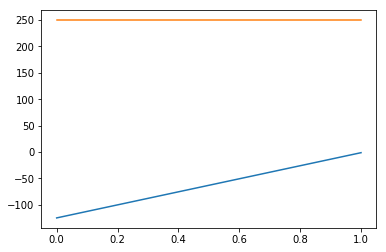

In [15]:
plt.plot(L_grid, C)
plt.plot(L_grid, Sgm)
plt.show()

In [16]:
np.multiply(np.multiply(np.multiply(np.multiply(l0v,np.power(np.add(np.multiply(np.divide(np.divide(s,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0),b),1),x)),np.power(np.subtract(1,np.divide(np.divide(s,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0)),y)),np.power(np.subtract(1,np.divide(np.divide(s,su),v)),z)),c)

NameError: name 's' is not defined

In [ ]:
s0=s/(rs*c3*c4*v)
l=l0v*((1+b*s0/e0)**x)*((1-s0/e0)**y)*((1-s/su/v)**z)